# Diabetes Classification Dataset

This project focuses on utilizing data from the Behavioral Risk Factor Surveillance System (BRFSS), an annual health-related telephone survey conducted by the CDC. Our primary goal is to leverage machine learning models for the **classification** of diabetes risk among patients, enabling comparisons of model performances based on various model types and dataset characteristics. Effective classification can significantly contribute to early detection of diabetes or prediabetes, thus preventing severe health outcomes associated with these conditions. Early identification fosters improved patient care and aids physicians in making informed diagnostic decisions.

The dataset for this study, `diabetes_012_health_indicators_BRFSS2015.csv`, comprises 253,680 responses from the BRFSS 2015 survey. It features a target variable, `Diabetes_012`, categorized into three classes: '0' for no diabetes or cases only during pregnancy, '1' for prediabetes, and '2' for diabetes, highlighting a prevalent class imbalance. This dataset, enriched with 21 feature variables, serves as a critical tool for our analysis.

Our data is sourced from the University of California Irvine Machine Learning Repository and is available on Kaggle, initially derived from the CDC's dataset. These sources ensure a comprehensive foundation for our machine learning endeavors aimed at diabetes classification.

**Citations:**
- [CDC (2015). Behavioral Risk Factor Surveillance System. Retrieved from Kaggle Dataset.](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)

- UCI Machine Learning Repository. Diabetes Health Indicators Dataset. Available at: https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators.

### Data Imports, package imports and dataframe setup

In [138]:
# Import all necessary libraries for the project
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

In [109]:
# Read the data into a DataFrame in pandas
data = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

# Dataset Characteristics

In [110]:
# Shape of the data
print(f"Shape of dataset:{data.shape}")

# MegaByte size of the file
total_memory_usage_bytes = data.memory_usage(deep=True).sum()
megabytes = total_memory_usage_bytes / (1024**2)
print(f'Total Memory Usage: {megabytes:.2f} MB')

# All column names
print(data.columns)

Shape of dataset:(253680, 22)
Total Memory Usage: 42.58 MB
Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [111]:
# Data types for all columns 
print(data.dtypes)

# Print out the first five rows 
data.head()

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


### Data Description for Diabetes Classification Dataset

The dataset consists of responses from the Behavioral Risk Factor Surveillance System (BRFSS) 2015 survey, aimed at classifying the risk of diabetes among individuals. It encompasses a total of **253,680 samples (rows)** and **22 features (columns)**, with a total memory usage of **42.58 MB**. This sizeable dataset provides a robust foundation for developing and evaluating machine learning models.

#### Feature Overview:
- **Target Variable**: `Diabetes_012` categorizes individuals into three groups: 0 for no diabetes or only during pregnancy, 1 for prediabetes, and 2 for diabetes. This variable is crucial for our classification task.
- **Binary Features**: Several features are binary (0 or 1), indicating the presence or absence of certain health conditions or behaviors, including `HighBP` (high blood pressure), `HighChol` (high cholesterol), `Smoker`, `Stroke`, `HeartDiseaseorAttack`, `PhysActivity`, `Fruits`, `Veggies`, `HvyAlcoholConsump`, `AnyHealthcare`, `NoDocbcCost`, and `DiffWalk`.
- **Continuous Features**: `BMI` represents the Body Mass Index, a key indicator of health. `GenHlth` (general health status), `MentHlth` (days of poor mental health), and `PhysHlth` (days of poor physical health) are ordinal features reflecting health conditions.
- **Demographic Features**: `Sex`, `Age`, `Education`, and `Income` provide demographic context, essential for understanding health patterns across different populations.

#### Data Characteristics:
- The dataset is primarily tabular, with a mix of binary, continuous, and ordinal data types. This diversity requires careful preprocessing to ensure models can effectively learn from the data.
- Features like `Age`, `Education`, and `Income` are ordinal, presenting a range of values that need to be appropriately handled during the modeling process.
- The class imbalance in the target variable (`Diabetes_012`) poses a significant challenge, necessitating strategies like SMOTE for balancing during model training.

# Data Cleaning and preprocessing

In [112]:
# Convert the binary columns from float type to int to help with memory/speed when training the data
non_binary_columns = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

# Loop through all columns in the dataframe
for column in data.columns:
    # If the column is not in the list of non-binary columns, convert it to int
    if column not in non_binary_columns:
        data[column] = data[column].astype(int)


# Print out all dtypes after conversion to int
print(data.dtypes)

Diabetes_012              int64
HighBP                    int64
HighChol                  int64
CholCheck                 int64
BMI                     float64
Smoker                    int64
Stroke                    int64
HeartDiseaseorAttack      int64
PhysActivity              int64
Fruits                    int64
Veggies                   int64
HvyAlcoholConsump         int64
AnyHealthcare             int64
NoDocbcCost               int64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                  int64
Sex                       int64
Age                     float64
Education               float64
Income                  float64
dtype: object


### Scale our non-binary data to help with modeling

In [113]:
# Initialize MinMaxScaler for scaling data 
scaler = MinMaxScaler()
data[non_binary_columns] = scaler.fit_transform(data[non_binary_columns])

### Encode Diabetes Column as Binary value
The original data has it as 0 for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. We will encode the data as either 0 for no diabetes or only during pregnancy, and 1 for prediabetes/diabetes. 

In [114]:
# Clean the dataset to Encode the diabetes column as binary for 0 = no diabetes, and 1 == pre-diabetes or diabetes
data['Diabetes_binary'] = (data['Diabetes_012'] > 0).astype(int)

# Drop the orginal 'Diabetes_012' column to avoid multicollinearity
data = data.drop('Diabetes_012', axis = 1)

In [115]:
# Check for columns with NA values
print(data.isna().sum())

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64


In [116]:
# Determine the composition of our Diabetes Binary Class for our modeling 
print("Ratio of diabetes/prediabetes or Neither (0,1) in data set:", data['Diabetes_binary'].sum() / len(data))

Ratio of diabetes/prediabetes or Neither (0,1) in data set: 0.15758830022075054


### Data balancing for modeling

This dataset contains class imbalance with only ~15.7% of the data having diabetes. With our predictions we need to sample the data in a way for training that will allow the diabetes data to be trained properly. We will be using the imbalanaced-learn package to sample the data with the SMOTE (Synthetic Minority Over-sampling Technique). Using only the training data with SMOTE will avoid data leakage into the testing dataset. 

In [117]:
random_state = 12

# Model variables
X = data.drop(["Diabetes_binary"], axis = 1)
y = data['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=random_state)

# Use SMOTE for balancing the training data
smote = SMOTE(random_state=random_state)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Data Cleaning Summary

The preliminary stage of our analysis involved a meticulous data cleaning process, crucial for preparing the dataset for effective model training and ensuring reliable predictions. This section outlines our cleaning methodology, the rationale behind each step, and the implications of these actions on our dataset.

### Conversion of Binary Columns

Our initial step focused on optimizing the dataset for memory efficiency and computational speed. We identified several columns representing binary variables (e.g., `HighBP`, `Smoker`, `PhysActivity`) that were incorrectly typed as `float64`. To address this:

- **Action**: Converted all binary variables, except for the explicitly listed non-binary columns, from `float64` to `int64`.
- **Rationale**: This type conversion reduces memory usage and aligns with the binary nature of these variables, enhancing model performance.
- **Impact**: Post-conversion, the dataset's memory footprint decreased, facilitating faster computations during model training.

### Scaling Non-Binary Data

Given the presence of continuous and ordinal variables within our dataset, scaling was imperative to normalize the data distribution:

- **Action**: Applied `MinMaxScaler` to non-binary columns (`BMI`, `GenHlth`, `MentHlth`, `PhysHlth`, `Age`, `Education`, `Income`).
- **Rationale**: Scaling ensures that these variables contribute equally to model training, preventing features with larger ranges from disproportionately influencing the model.
- **Impact**: This step prepared our dataset for algorithms sensitive to the scale of input features, promoting a balanced learning environment.

### Encoding the Target Variable

With the goal of simplifying our classification task, we modified the target variable to reflect a binary outcome:

- **Action**: Encoded `Diabetes_012` into a binary variable, `Diabetes_binary`, distinguishing between no diabetes (0) and the presence of prediabetes/diabetes (1).
- **Rationale**: This encoding addresses the class imbalance and refines our classification objective to a binary task, streamlining model interpretation.
- **Impact**: The redefined target variable facilitates a focused analysis on the binary classification of diabetes risk, enhancing model clarity and relevance.

### Addressing Class Imbalance with SMOTE
Recognizing the significant class imbalance—where only approximately 15.7% of the data indicated diabetes—we employed the Synthetic Minority Over-sampling Technique (SMOTE) from the imbalanced-learn package. This approach involved resampling the training data to ensure that models could effectively learn the characteristics of the minority class, thereby enhancing the reliability of our predictions while preventing data leakage into the testing dataset.

### Addressing Missing Values and Final Preparations

A thorough examination for missing values was conducted to ensure dataset completeness:

- **Action**: Checked for and addressed NA values across the dataset. Our dataset revealed no missing values, obviating the need for imputation.
- **Rationale**: Missing data can introduce bias and affect model accuracy. Confirming the absence of NAs ensures the integrity of our analysis.
- **Impact**: With a complete dataset, we proceed with confidence that our models will learn from a comprehensive representation of the data.

# Exploratory Data Analysis (EDA)

### Determine which columns we see correlations with Diabetes_binary before modeling

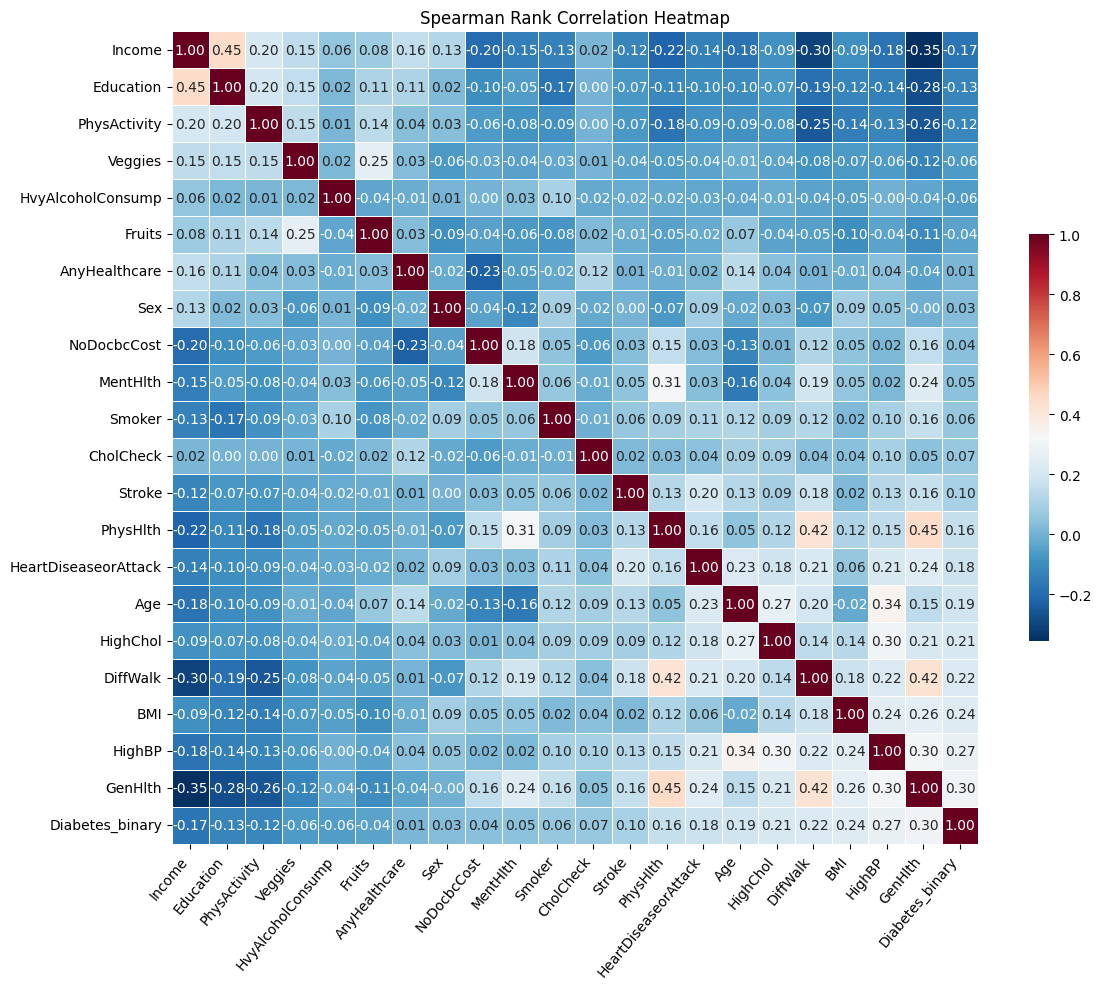

In [118]:
# Create a heatmap with the correlations of all the varaibles. 
spearman_correlations = data.corr(method='spearman')
sorted_columns = spearman_correlations['Diabetes_binary'].sort_values(ascending=True).index
sorted_corr_matrix = spearman_correlations.reindex(sorted_columns, axis=0).reindex(sorted_columns, axis=1)

plt.figure(figsize=(12, 10)) 
sns.heatmap(sorted_corr_matrix, annot=True, cmap='RdBu_r', fmt=".2f", 
            linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Spearman Rank Correlation Heatmap')
plt.xticks(rotation=50, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()  
plt.show()



## Insights from Correlation Analysis with Diabetes Binary Outcome

Our correlation analysis, utilizing Spearman's rank correlation, has unveiled important insights into the factors associated with diabetes status (`Diabetes_binary`). This methodological choice was pivotal in accommodating the ordinal nature of certain variables and the dataset's non-linear relationships.

### Strongest Correlations

- **General Health (GenHlth)** emerges as the most significantly correlated variable, highlighting a clear association between individuals' perceived health and diabetes. This finding aligns with clinical expectations, as diabetes often correlates with poorer general health statuses.

### Variables with Minimal Correlation

A subset of variables displayed negligible correlations with diabetes status, prompting considerations beyond face value:

- **Dietary Habits** (`Veggies`, `Fruits`): The weak negative correlations suggest minimal direct association with diabetes status. However, it's important to consider the potential for **inconsistent data** in self-reported dietary habits. Such variables are prone to social desirability bias, where respondents might overreport consumption in line with perceived healthy norms.

- **Lifestyle Factors** (`HvyAlcoholConsump`, `Smoker`): Similarly, these lifestyle factors showed almost no correlation. The likelihood of **underreporting** due to social stigma or personal bias, especially concerning alcohol consumption and smoking, necessitates a cautious interpretation. These habits are generally known to impact health significantly but may not be accurately captured in survey-based datasets.

### Implications for Modeling and Further Research

- **Prioritization for Predictive Modeling**: High-correlation variables, including health indicators like `HighBP`, `BMI`, `DiffWalk`, and `HighChol`, warrant prioritization in modeling efforts due to their substantiated relationships with diabetes.

- **Reevaluation of Lifestyle Variables**: Given the potential for underreporting and data inconsistency, variables related to lifestyle and dietary habits require careful consideration. They may not directly reflect actual behaviors or their impact on diabetes risk within this dataset.

### Explore the distributions of all of the columns

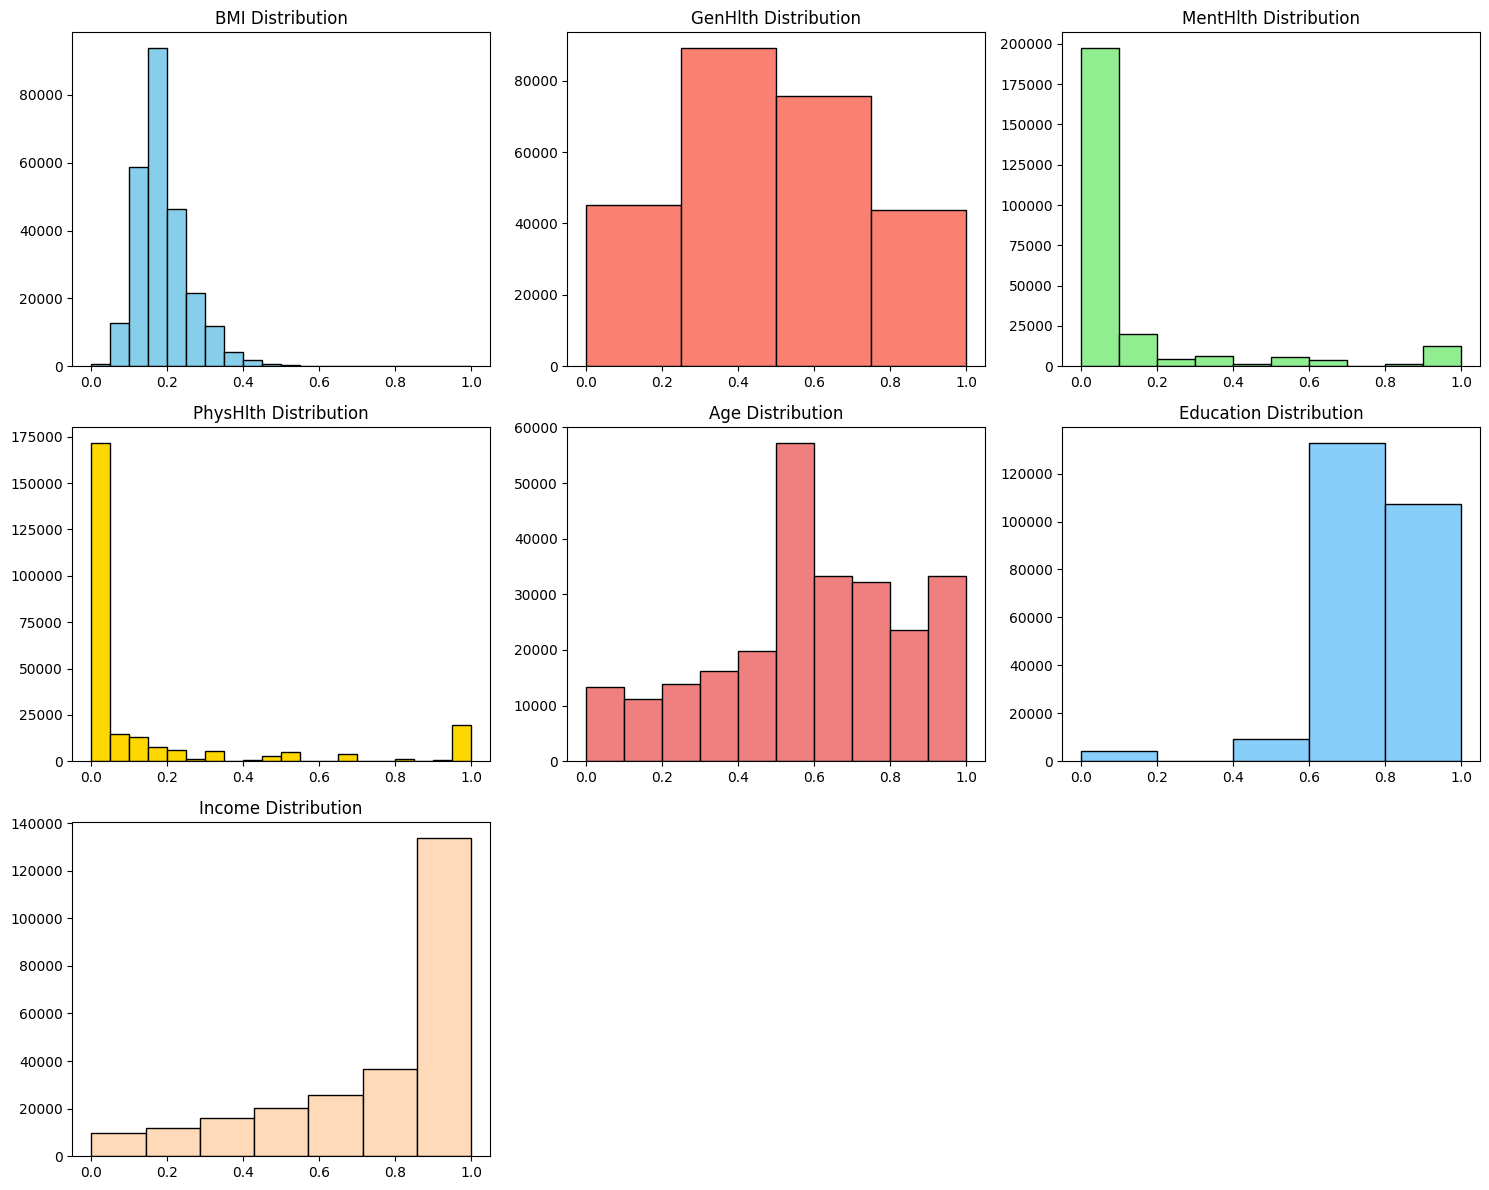

In [119]:
variables_info = [
    ('BMI', 'skyblue', 20),
    ('GenHlth', 'salmon', 4),
    ('MentHlth', 'lightgreen', 10),
    ('PhysHlth', 'gold', 20),
    ('Age', 'lightcoral', 10),
    ('Education', 'lightskyblue', 5),
    ('Income', 'peachpuff', 7)
]

plt.figure(figsize=(15, 12))

for i, (var, color, bins) in enumerate(variables_info, start=1):
    plt.subplot(3, 3, i)  
    plt.hist(data[var], bins=bins, color=color, edgecolor='black')
    plt.title(f'{var} Distribution')

plt.tight_layout()
plt.show()

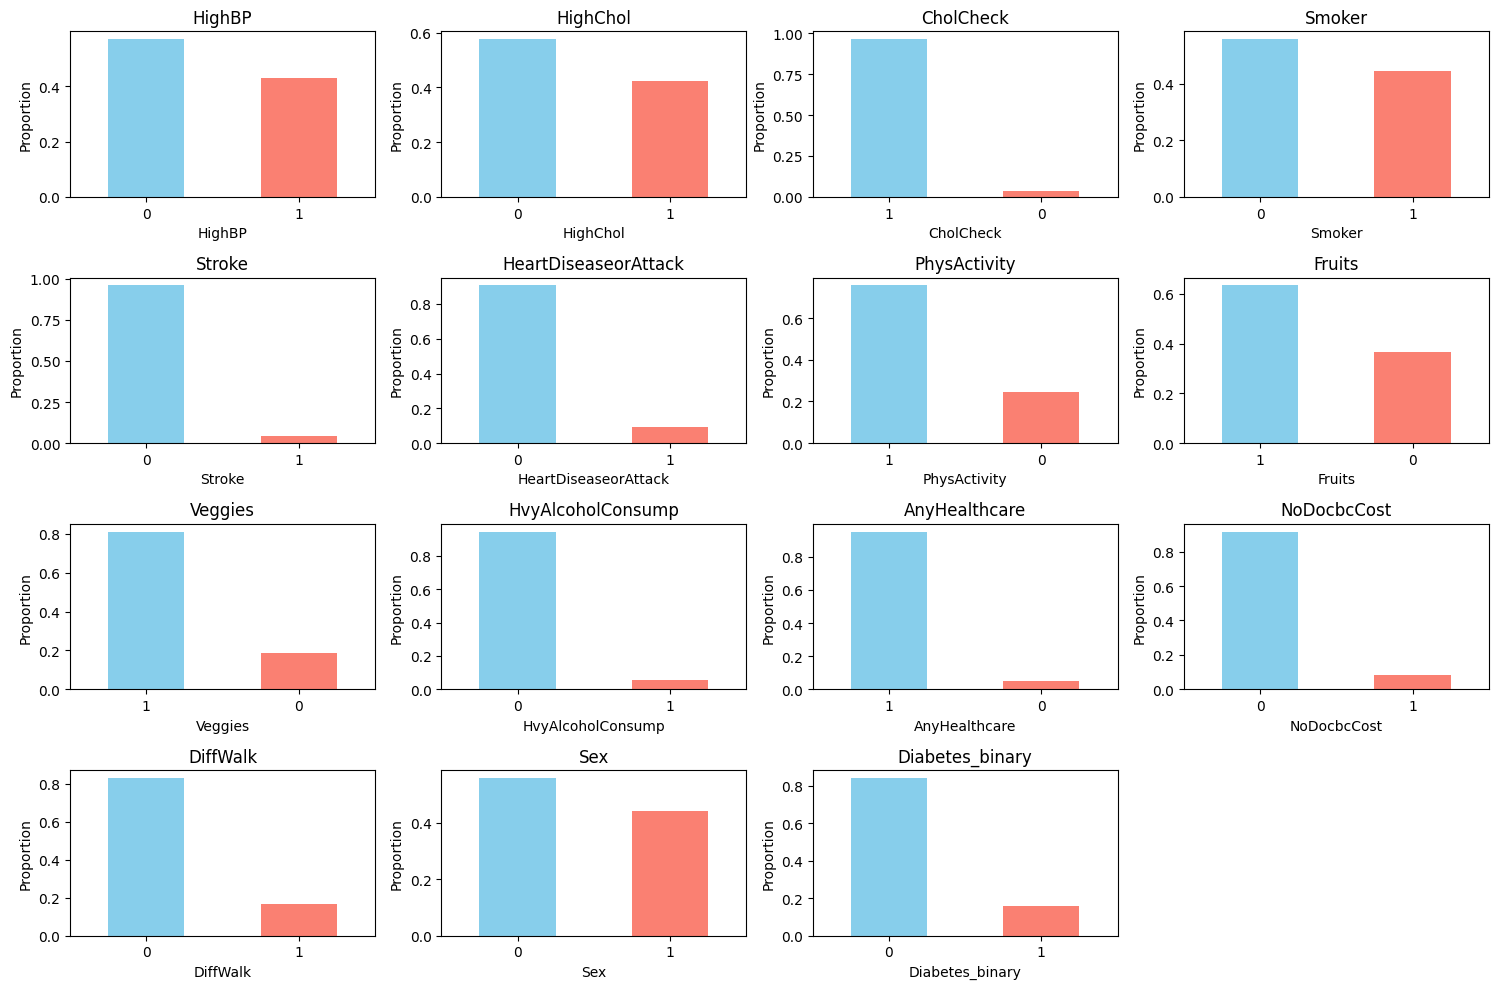

In [120]:
binary_columns = [col for col in data.columns if col not in non_binary_columns]

plt.figure(figsize=(15, 10))
for i, column in enumerate(binary_columns, start=1):
    
    counts = data[column].value_counts(normalize=True)  
    
    
    plt.subplot(4, 4, i)  
    counts.plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title(column)
    plt.xticks(rotation=0)  
    plt.ylabel('Proportion')

plt.tight_layout()
plt.show()

**EDA of Parameter P-values from standard Logistic model**

We will use these p-values along with our correaltion matrix to determine the significance of different predictors in our model. This can help us refine prior to our larger models being trained. 

In [121]:
X_train_sm = sm.add_constant(X_train_balanced)

# Fitting the model 
model = sm.Logit(y_train_balanced, X_train_sm).fit()

# Model summary
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.515762
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:               342114
Model:                          Logit   Df Residuals:                   342092
Method:                           MLE   Df Model:                           21
Date:                Sun, 07 Apr 2024   Pseudo R-squ.:                  0.2559
Time:                        13:27:25   Log-Likelihood:            -1.7645e+05
converged:                       True   LL-Null:                   -2.3714e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -5.3244      0.049   -108.508      0.000      -5.421      -5.228

Now we will use backwards elimination until we only have significant predictors. We will only use these for our future models in the next sections. 

In [122]:
# Use backward selection from this original model until we get only significant predictors on the dataset
def backward_elimination(x, y, significance_level = 0.05):
    num_vars = len(x.columns)
    for i in range(0, num_vars):
        regressor_OLS = sm.Logit(y, sm.add_constant(x)).fit(disp=0)  
        max_p_value = max(regressor_OLS.pvalues)
        if max_p_value > significance_level:
            feature_with_max_p_value = regressor_OLS.pvalues.idxmax()
            x = x.drop(feature_with_max_p_value, axis=1)
        else:
            break
    print(regressor_OLS.summary())
    return x

X_optimal = backward_elimination(X_train_balanced, y_train_balanced)

                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:               342114
Model:                          Logit   Df Residuals:                   342096
Method:                           MLE   Df Model:                           17
Date:                Sun, 07 Apr 2024   Pseudo R-squ.:                  0.2559
Time:                        13:27:29   Log-Likelihood:            -1.7645e+05
converged:                       True   LL-Null:                   -2.3714e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -5.3317      0.046   -114.836      0.000      -5.423      -5.241
HighBP                   0.6366      0.009     71.236      0.000       0.619       0.654
HighChol    

Comparing the full model versus the smaller model to ensure there is not a significant difference. 

In [123]:
full_model = sm.Logit(y_train_balanced, sm.add_constant(X_train_balanced)).fit(disp=0)

# Reduced model with predictors after backward elimination
reduced_model = sm.Logit(y_train_balanced, sm.add_constant(X_optimal)).fit(disp=0)

# Compare AIC and BIC
print("Full Model AIC:", full_model.aic)
print("Reduced Model AIC:", reduced_model.aic)
print("Full Model BIC:", full_model.bic)
print("Reduced Model BIC:", reduced_model.bic)

Full Model AIC: 352942.7926574003
Reduced Model AIC: 352943.15022352163
Full Model BIC: 353179.13644186466
Reduced Model BIC: 353136.52241081063


In [124]:
# List of non-significant variables to be removed
variables_to_remove = ['AnyHealthcare', 'NoDocbcCost', 'Smoker', 'Stroke']

X_test = X_test.drop(variables_to_remove, axis=1)

### Comparison Summary

The comparison of AIC and BIC values between the full and reduced logistic regression models indicates a minimal difference in model performance, with a slight preference for the reduced model due to its lower complexity:

- **AIC Values**: The reduced model has an AIC value marginally higher than the full model (352943.15 vs. 352942.79), suggesting a negligible increase in information loss despite the reduction in predictors.
- **BIC Values**: The reduced model demonstrates a lower BIC value compared to the full model (353136.52 vs. 353179.14), indicating it is the preferred model when accounting for both fit and model complexity.

We will use the reduced model for the Model testing with all other models in this project. 

# Model Testing

## Overview
Our goal is to pinpoint the best-performing classification model for our dataset. By employing SMOTE for dataset balancing, optimizing hyperparameters with Grid Search CV, and utilizing all CPU cores for efficient processing, we navigate towards an informed model selection.

## Models and Their Strengths
- **Logistic Regression**: A fundamental model for binary outcomes, valued for its simplicity and interpretability. It estimates probabilities that allow for a clear threshold decision.

- **Random Forest Classifier**: Utilizes an ensemble of decision trees to reduce overfitting and improve prediction accuracy. It's known for its robustness and ability to handle non-linear data.

- **K-Nearest Neighbors (KNN)**: A non-parametric method that classifies each data point based on the majority label of its nearest neighbors. It's simple yet effective, with performance depending on the choice of the distance metric and the value of k.

- **Gradient Boosting Classifier**: Builds models sequentially, each correcting its predecessor, which combines weak models to create a strong model. It's powerful for handling various data types and relationships.

- **LinearSVC (Support Vector Machine)**: A variant of SVM optimized for linear classification. It's effective in high-dimensional spaces and for cases where the number of dimensions exceeds the number of samples.

## Evaluation Strategy
Our comprehensive assessment leans on accuracy, Precision, Recall, F1 Score, and ROC AUC to offer a holistic view of model performance. These metrics are crucial for understanding how well each model can manage class imbalances and make accurate classifications.

## Outcome
This methodical approach will lead us to select a model that not only performs well across our metrics but also effectively handles the nuances of our specific dataset, ensuring reliable predictions.

In [125]:
# Define the parameter grid
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100, 150],
    'solver': ['liblinear', 'lbfgs']  
}

# Initialize the GridSearchCV object
grid_search_lr = GridSearchCV(LogisticRegression(random_state=random_state, max_iter=1000), param_grid_lr, cv=3, scoring='roc_auc')

# Fit the model
grid_search_lr.fit(X_optimal, y_train_balanced)

# Best parameters and best score
print(f"Best parameters for Logistic Regression: {grid_search_lr.best_params_}")
print(f"Best ROC AUC for Logistic Regression: {grid_search_lr.best_score_:.4f}")

# Evaluate on the test set
y_pred_lr = grid_search_lr.predict(X_test)
y_pred_proba_lr = grid_search_lr.predict_proba(X_test)[:, 1]  

# Print classification report
print(classification_report(y_test, y_pred_lr))

# Calculate and print ROC AUC
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
print(f"ROC AUC on Test Set: {roc_auc_lr:.4f}\n")


Best parameters for Logistic Regression: {'C': 150, 'solver': 'lbfgs'}
Best ROC AUC for Logistic Regression: 0.8220
              precision    recall  f1-score   support

           0       0.94      0.72      0.82     42646
           1       0.34      0.77      0.47      8090

    accuracy                           0.73     50736
   macro avg       0.64      0.74      0.65     50736
weighted avg       0.85      0.73      0.76     50736

ROC AUC on Test Set: 0.8194



In [126]:
# Define the parameter grid
param_grid_rf = {
    'n_estimators': [10, 50, 100],  
    'max_depth': [None, 10, 20, 30]  
}

# Initialize the GridSearchCV object
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=random_state), param_grid_rf, cv=3, scoring='roc_auc', n_jobs=-1)

# Fit the model
grid_search_rf.fit(X_optimal, y_train_balanced)

# Best parameters and best score
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best ROC AUC for Random Forest: {grid_search_rf.best_score_:.4f}")

# Evaluate on the test set
y_pred_rf = grid_search_rf.predict(X_test)
y_pred_proba_rf = grid_search_rf.predict_proba(X_test)[:, 1]

# Print classification report
print(classification_report(y_test, y_pred_rf))

# Calculate and print ROC AUC
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"ROC AUC on Test Set: {roc_auc_rf:.4f}\n")


Best parameters for Random Forest: {'max_depth': 30, 'n_estimators': 100}
Best ROC AUC for Random Forest: 0.9674
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     42646
           1       0.45      0.34      0.39      8090

    accuracy                           0.83     50736
   macro avg       0.67      0.63      0.64     50736
weighted avg       0.81      0.83      0.82     50736

ROC AUC on Test Set: 0.7937



In [133]:
# Define the parameter grid
param_grid_knn = {
    'n_neighbors': [2, 3, 4], 
    'metric': ['euclidean', 'manhattan']  
}

# Initialize the GridSearchCV object
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='roc_auc')

# Fit the model
grid_search_knn.fit(X_optimal, y_train_balanced)

# Best parameters and best score
print(f"Best parameters for KNN: {grid_search_knn.best_params_}")
print(f"Best ROC AUC for KNN: {grid_search_knn.best_score_:.4f}")

# Evaluate on the test set
y_pred_knn = grid_search_knn.predict(X_test)

# Since KNN doesn't directly support predict_proba, we use a workaround or skip ROC AUC
# Print classification report
print(classification_report(y_test, y_pred_knn))


Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3}
Best ROC AUC for KNN: 0.8982
              precision    recall  f1-score   support

           0       0.89      0.81      0.85     42646
           1       0.32      0.48      0.38      8090

    accuracy                           0.75     50736
   macro avg       0.60      0.64      0.61     50736
weighted avg       0.80      0.75      0.77     50736



In [139]:
# Define the parameter grid
param_grid_gb = {
    'n_estimators': [100, 120,200],  
    'learning_rate': [0.05, 0.1, 0.2],  
    'max_depth': [4,8,10]  
}

# Initialize the GridSearchCV object
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=random_state, warm_start=True), param_grid_gb, cv=3, scoring='roc_auc', n_jobs=-1)

# Fit the model
grid_search_gb.fit(X_optimal, y_train_balanced)

# Best parameters and best score
print(f"Best parameters for Gradient Boosting: {grid_search_gb.best_params_}")
print(f"Best ROC AUC for Gradient Boosting: {grid_search_gb.best_score_:.4f}")

# Evaluate on the test set
y_pred_gb = grid_search_gb.predict(X_test)
y_pred_proba_gb = grid_search_gb.predict_proba(X_test)[:, 1]

# Print classification report
print(classification_report(y_test, y_pred_gb))

# Calculate and print ROC AUC
roc_auc_gb = roc_auc_score(y_test, y_pred_proba_gb)
print(f"ROC AUC on Test Set: {roc_auc_gb:.4f}\n")


Best parameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 120}
Best ROC AUC for Gradient Boosting: 0.9604
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     42646
           1       0.52      0.33      0.40      8090

    accuracy                           0.84     50736
   macro avg       0.70      0.64      0.66     50736
weighted avg       0.82      0.84      0.83     50736

ROC AUC on Test Set: 0.8222



In [137]:
# Initialize LinearSVC
linear_svc = LinearSVC(random_state=random_state, max_iter=1000, dual='auto')

# Calibrate model to allow for probability estimates
calibrated_svc = CalibratedClassifierCV(linear_svc, method='sigmoid', cv=3)
calibrated_svc.fit(X_optimal, y_train_balanced)

# Predict on test set
y_pred_svc = calibrated_svc.predict(X_test)

# Obtain probabilities for ROC AUC
y_pred_proba_svc = calibrated_svc.predict_proba(X_test)[:, 1]

# Evaluation metrics
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)
roc_auc_svc = roc_auc_score(y_test, y_pred_proba_svc)

# Print metrics
print("LinearSVC (with Calibration):")
print(f"Accuracy: {accuracy_svc:.4f}, Precision: {precision_svc:.4f}, Recall: {recall_svc:.4f}, F1 Score: {f1_svc:.4f}, ROC AUC: {roc_auc_svc:.4f}")

# Print classification report
print(classification_report(y_test, y_pred_svc))


LinearSVC (with Calibration):
Accuracy: 0.7278, Precision: 0.3424, Recall: 0.7684, F1 Score: 0.4737, ROC AUC: 0.8194
              precision    recall  f1-score   support

           0       0.94      0.72      0.82     42646
           1       0.34      0.77      0.47      8090

    accuracy                           0.73     50736
   macro avg       0.64      0.74      0.65     50736
weighted avg       0.85      0.73      0.76     50736



# Taking the best model and doing further optimization

Now we will take the gradient boosting classifier from the last section and start with the base parameters we found as best fit and tune one parameter at a time for the remaining parameters. 
here are the parameters we will use as a starting point: Best parameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 120}


In [140]:
# Define the parameter grid for 'max_depth'
param_grid = {
    'max_depth': [6, 7, 8, 9, 10]
}

# Initialize the model with the best parameters except for 'max_depth'
model = GradientBoostingClassifier(random_state=random_state, warm_start=True, learning_rate=0.05, n_estimators=120)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)

# Fit the model
grid_search.fit(X_optimal, y_train_balanced)

# Print the best 'max_depth' parameter
print(f"Optimal 'max_depth': {grid_search.best_params_['max_depth']}")


Optimal 'max_depth': 8


In [141]:
# Define the parameter grid 
param_grid = {
    'n_estimators': [110, 120,130,140]
}

# Initialize the model with the best parameters 
model = GradientBoostingClassifier(random_state=random_state, warm_start=True, learning_rate=0.05, max_depth=8)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)

# Fit the model
grid_search.fit(X_optimal, y_train_balanced)

print(f"Optimal 'n_estimators': {grid_search.best_params_['n_estimators']}")

Optimal 'n_estimators': 130


In [142]:
# Define the parameter grid 
param_grid = {
    'learning_rate': [.01,.02,.04, .05,.06]
}

# Initialize the model with the best parameters 
model = GradientBoostingClassifier(random_state=random_state, max_depth=8, n_estimators=130)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)

# Fit the model
grid_search.fit(X_optimal, y_train_balanced)

print(f"Optimal 'learning_rate': {grid_search.best_params_['learning_rate']}")

Optimal 'learning_rate': 0.05


In [143]:
# Define the parameter grid 
param_grid = {
    'min_samples_split': [2, 5, 10, 20, 50]
}

model = GradientBoostingClassifier(random_state=random_state, learning_rate=0.05, n_estimators=130, max_depth=8)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)


grid_search.fit(X_optimal, y_train_balanced)


print(f"Optimal 'min_samples_split': {grid_search.best_params_['min_samples_split']}")


Optimal 'min_samples_split': 2


In [146]:
# Define the parameter grid 
param_grid = {
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

# Initialize the model 
model = GradientBoostingClassifier(random_state=random_state, learning_rate=0.05, n_estimators=130, max_depth=8, min_samples_split=2)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)

# Fit the model
grid_search.fit(X_optimal, y_train_balanced)


print(f"Optimal 'min_samples_leaf': {grid_search.best_params_['min_samples_leaf']}")

Optimal 'min_samples_leaf': 1


In [148]:
# Define the parameter grid 
param_grid = {
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.7]
}

# Initialize the model 
model = GradientBoostingClassifier(random_state=random_state, learning_rate=0.05, n_estimators=130, max_depth=8, min_samples_split = 2,min_samples_leaf=1)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)

# Fit the model
grid_search.fit(X_optimal, y_train_balanced)


print(f"Optimal 'max_features': {grid_search.best_params_['max_features']}")

Optimal 'max_features': None


### The optimial model has these attributes:

model = GradientBoostingClassifier(random_state=random_state, learning_rate=0.05, n_estimators=130, max_depth=8, min_samples_split = 2,min_samples_leaf=1,max_features=None)

In [149]:
# Train and test the optimal model
model = GradientBoostingClassifier(
    random_state=random_state, 
    learning_rate=0.05, 
    n_estimators=130, 
    max_depth=8, 
    min_samples_split=2,
    min_samples_leaf=1, 
    max_features=None
)

# Fit the model on the optimal training set
model.fit(X_optimal, y_train_balanced)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  

# Evaluate the model
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC on Test Set: {roc_auc:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

ROC AUC on Test Set: 0.8222

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91     42646
           1       0.53      0.32      0.40      8090

    accuracy                           0.85     50736
   macro avg       0.70      0.63      0.66     50736
weighted avg       0.82      0.85      0.83     50736



# Optimal Model Performance Summary

After a thorough process of feature selection and parameter tuning, our Gradient Boosting Classifier has been optimized with the following configuration: a `learning_rate` of 0.05, `n_estimators` set to 130, `max_depth` at 8, `min_samples_split` at 2, `min_samples_leaf` at 1, and using all features (`max_features=None`). This model was trained on a balanced dataset to address class imbalance, ensuring a fair representation of both classes.

### Model Evaluation Results

The performance of the optimized model on the test set is summarized below:

- **ROC AUC**: The model achieved an ROC AUC of 0.8222, indicating a strong ability to differentiate between the presence and absence of diabetes.

- **Classification Performance**:
    - **Precision** for class 1 (Diabetes presence): 0.53, indicating that 53% of the model's positive predictions were correct.
    - **Recall** for class 1: 0.32, meaning the model correctly identified 32% of all actual positive cases.
    - **F1-score** for class 1: 0.40, a balance between precision and recall for the positive class.
    - The model showed high **accuracy** of 0.85, reflecting its overall correct prediction rate across both classes.
    - **Precision** for class 0 (No diabetes): 0.88, with a **recall** of 0.94, demonstrating the model's effectiveness in identifying negative cases.

### Implications

The model demonstrates commendable performance, particularly in identifying individuals without diabetes, as evidenced by high precision and recall for class 0. The lower recall for class 1 suggests areas for potential improvement in future model iterations, possibly through more advanced feature engineering or alternative modeling techniques.

This optimal model provides a valuable tool for healthcare analytics, offering insights into diabetes risk prediction that can inform both clinical decision-making and individual health management.